## Melbourne house prices

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
train_data = pd.read_csv('home-data-for-ml-course/train.csv', index_col='Id')
test_data = pd.read_csv('home-data-for-ml-course/test.csv', index_col='Id')


In [51]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [52]:
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


### Exploratory Data Analysis

In [53]:
def num_cols(data, drop_salePrice=False):
    if drop_salePrice == False:
        return data.select_dtypes(exclude=['object']).drop('SalePrice', axis = 1).columns
    else :
        return data.select_dtypes(exclude=['object']).columns


def cat_cols(data):
    return data.select_dtypes(include=['object']).columns


### Numerical Data

In [54]:
# "when dealing with a dataset have a lot of cols like this, avoiding statics on real and concrete numerical metrics"
# looking at this one like shit,  can't even decide where to look at and analyze
train_data[num_cols(train_data)].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [55]:

def missing_percent_score(data,cols, show_uni_val=False):
        missing_value_cols = [col for col in  cols if data[col].isnull().sum() > 0]
        missing_proportions = {mis_cols : data[mis_cols].isnull().value_counts(normalize=True).to_list() for mis_cols in missing_value_cols}

        uni_vals = { mis_col : data[mis_col].nunique() / 100 for mis_col in missing_value_cols}
        if show_uni_val == False:
            return pd.DataFrame(missing_proportions, index=['', "Missing proportion"]).T.sort_values('Missing proportion') * 100
                
        [ missing_proportions[col].append(uni_vals[col]) for col in uni_vals.keys()]
        return pd.DataFrame(missing_proportions, index=['', "Missing proportion", "Uni_vals"]).T.sort_values('Missing proportion') * 100

num_missing_cols = ['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

missing_percent_score(train_data, num_cols(train_data))    

,,Missing proportion
MasVnrArea,99.452055,0.547945
GarageYrBlt,94.452055,5.547945
LotFrontage,82.260274,17.739726


### Categorical Data

In [56]:
# "when dealing with a dataset have a lot of cols like this, avoiding statics on real and concrete numerical metrics"
train_data[cat_cols(train_data)].describe(include='object').T.sort_values('unique')


,count,unique,top,freq
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
CentralAir,1460,2,Y,1365
Utilities,1460,2,AllPub,1459
MasVnrType,588,3,BrkFace,445
LandSlope,1460,3,Gtl,1382
PoolQC,7,3,Gd,3
PavedDrive,1460,3,Y,1340
GarageFinish,1379,3,Unf,605
BsmtQual,1423,4,TA,649


In [57]:
cat_missing_cols = ['Electrical', 'PoolQC', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'MiscFeature', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

missing_percent_score(train_data, cat_cols(train_data), show_uni_val=True)


,,Missing proportion,Uni_vals
Electrical,99.931507,0.068493,5.0
PoolQC,99.520548,0.479452,3.0
BsmtQual,97.465753,2.534247,4.0
BsmtCond,97.465753,2.534247,4.0
BsmtFinType1,97.465753,2.534247,6.0
BsmtExposure,97.397260,2.602740,4.0
BsmtFinType2,97.397260,2.602740,6.0
MiscFeature,96.301370,3.698630,4.0
GarageType,94.452055,5.547945,6.0
GarageFinish,94.452055,5.547945,3.0


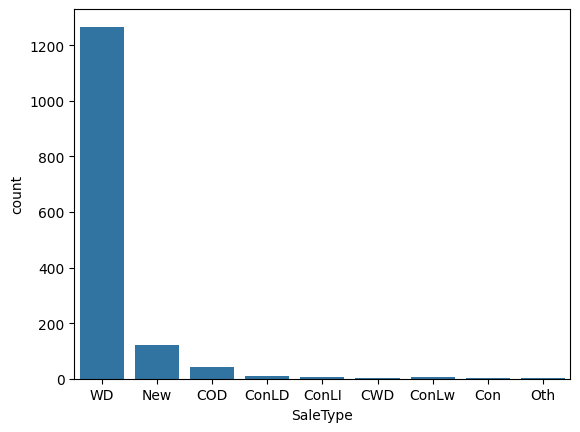

SaleType
WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: proportion, dtype: float64

In [58]:
sns.countplot(data=train_data, x='SaleType')
# plt.xticks(rotation=60)
plt.show()
train_data['SaleType'].value_counts(normalize=True)*100




### Data leakage handeling

In [59]:
potential_leak = [
    'Street',   # imbalance distributed, ~ 100% is Pave so not make a lot impact on models => drop
    'Alley',    # high rate missing value ~ 94% nan (no alley access) burdening model => drop
    'Utilities', # skewed distributed ~ 100% is AllPub, just one entries is NoSeWa => drop
    'LandSlope', # imbalance distributed ~ 95% is Gtl still unacceptable => drop
    'Neighborhood', # train_test leakage ~ Not relevant to house price => drop
    'Condition2', # imbalance distributed ~ 99% is Norm, burdening model = drop
    'BldgType', # not relevant to the house price => drop
    'YearRemodAdd', # not have good understand of this field => drop
    'RoofMatl', # imbalance distributed, ~98% is CompShg => drop
    'Exterior2nd', # not necessary, similar to 1nd one, burden for model => drop
    'ExterQual', # not necessary, => drop
    'Heating', # Overwhelm t, ~98% is GasA, => drop
    'LowQualFinSF', # overwhelm, ~98% is 0, => drop
    'BsmtHalfBath', # overwhelm, ~94% is 0, => drop
    'KitchenAbvGr', #overwhelm, ~95% is 1 => drop
    'Functional', #overwhelm, ~93% is Typ => drop
    'GarageYrBlt' , # not relevant to house price, => drop
    'GarageQual', #  overwhelm => ~95% is TA => drop
    'GarageCond', # overwhelm , ~96% is TA => drop
    '3SsnPorch', # overwhelm, ~98% is 0 =< drop
    'ScreenPorch', # overwhelm ~92% is 0, drop
    'PoolArea', # overwhelm, ~99% is 0 => drop
    'PoolQC', #overwhelm, ~100% is na => drop
    'MiscFeature', #Overwhelm, ~96% is nan => drop
    'MiscVal', ##overwhelm, ~ 96% is 0 => drop
    'SaleCondition', #any relevant here, => drop
]                                               

# Exterior2ndExterQual

train_data = train_data.drop(potential_leak, axis=1)
test_data = test_data.drop(potential_leak, axis=1)

### Handle Missing Data

In [60]:
X = train_data.drop("SalePrice",axis=1)
y = train_data["SalePrice"]
X_test = test_data

In [61]:
low_cardinality_cat_cols = [col for col in cat_cols(X) if X[col].nunique() < 10]
high_cardinality_cat_cols = [col for col in cat_cols(X) if X[col].nunique() > 10]

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

# preprocessing pipeline
num_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler())

cat_OH_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

cat_OR_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)


In [63]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols(X, drop_salePrice=True)),
    ('OH_cat', cat_OH_transformer, low_cardinality_cat_cols),
    ('OR_cat', cat_OR_transformer, high_cardinality_cat_cols)
], verbose=True)

In [64]:
preprocessor.fit(X=X)

[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing OH_cat, total=   0.0s
[ColumnTransformer] ........ (3 of 3) Processing OR_cat, total=   0.0s


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', '...
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'HeatingQC', 'CentralAir',
                                  'Electrical', 'KitchenQual', 'FireplaceQu',
                                  'GarageType', 'GarageFinish', 'PavedDrive',
                                  'Fence', 'SaleType']),
                                ('OR_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Exterior1st'])],
                  verbose=True)

In [65]:
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

### Score Dataset

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train , y_valid = train_test_split(X, y, random_state=16)


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model= RandomForestRegressor(n_estimators=900,verbose=True, random_state=16)
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    return mean_absolute_error(y_valid, predictions)


In [68]:
score_dataset(X_train, X_valid, y_train, y_valid)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    8.9s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   15.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.1s


19351.028642313544

### Cross validation

In [69]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

scores = -1 * cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error', verbose=True)

scores, scores.mean()



(array([17862.17446575, 17585.09179452, 17847.96379452, 16227.51812329,
        18935.7289589 ]),
 17691.69542739726)

### XGBoost

In [70]:
from xgboost import XGBRegressor

# def score_dataset_xgboost(X_train, X_valid, y_train, y_valid):
xg_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
# xg_model.fit(X_train, y_train)
# predictions = xg_model.predict(X_valid)
# mean_absolute_error(y_valid, predictions)

scores_xg = -1 * cross_val_score(xg_model, X, y, cv=5, scoring='neg_mean_absolute_error', verbose=True)

scores_xg, scores_xg.mean()




(array([16557.33203125, 17156.75568547, 17149.46168664, 14997.40112639,
        17868.67571436]),
 16745.925248822772)

In [71]:
X_test

array([[ 0.        ,  0.20205479,  0.04824604, ...,  0.        ,
         1.        , 12.        ],
       [ 0.        ,  0.20547945,  0.06060904, ...,  0.        ,
         1.        , 13.        ],
       [ 0.23529412,  0.18150685,  0.05856645, ...,  0.        ,
         1.        , 12.        ],
       ...,
       [ 0.        ,  0.4760274 ,  0.08740564, ...,  0.        ,
         1.        , 12.        ],
       [ 0.38235294,  0.14041096,  0.04272593, ...,  0.        ,
         1.        ,  6.        ],
       [ 0.23529412,  0.18150685,  0.03892122, ...,  0.        ,
         1.        ,  6.        ]])

In [72]:
# predictions

# Save test predictions to file
output = pd.DataFrame({'Id': test_data.index,
                       'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)